In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Latex
plt.style.use('rose-pine-moon')
%matplotlib inline

### Function of Multiple Variables

#### Graphin function of two variables

Graphing two functions:
1. $g(x, y) = \sqrt{9-x^2-y^2}$
2. $f(x, y) = x^2 + y^2$

`Note:` Parametric equations are used for better visualisations but they are meant to represent same standard equations.

In [2]:
def f(a, b, c, r):
    r = np.linspace(0, 5, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    r, theta = np.meshgrid(r, theta)

    x = a*r*np.cos(theta)
    y = b*r*np.sin(theta)
    z = c*r**2
    return np.stack([x, y , z], 1)

def g(r):
    theta = np.linspace(0, 2*np.pi, 50)
    phi = np.linspace(0, 0.5*np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    r = r* np.ones_like(phi)  
    x = r * np.sin(phi)*np.cos(theta)
    y = r * np.sin(phi)*np.sin(theta)
    z = r* np.cos(phi)
    return np.stack([x, y , z], 1)

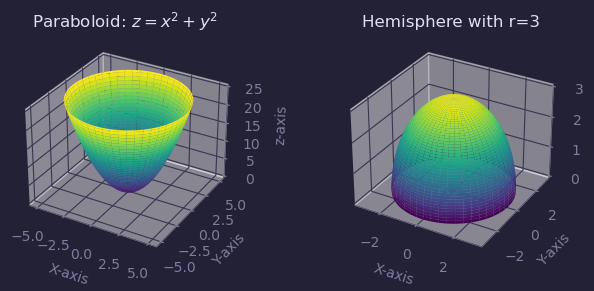

In [3]:
u = f(1, 1, 1, 1)
v = g(3)
fig, axs = plt.subplots(1, 2, figsize=(8,3), tight_layout = True, subplot_kw=dict(projection='3d'))
titles = ['Paraboloid: $z = x^2 + y^2$', 'Hemisphere with r=3']

for n, i in enumerate((u,v)):
    # surface plot of function f(x,y)
    axs[n].plot_surface(i[:,0], i[:,1],i[:,2], cmap='viridis')
    # figure properties
    axs[n].set_title(titles[n])
    axs[n].set_xlabel('X-axis')
    axs[n].set_ylabel('Y-axis')
    axs[n].set_zlabel('z-axis');

#### Level Curves

Given a function $f(x,y)$ and a number $c$ in the range of $f$, a level curve of a function of two variables for the value $c$ is defined to be the set of points satisfying the equation $f(x,y)=c$. <br>
A set of level curves is called a **contour map**.

In [4]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-7, 7, 100)
x, y = np.meshgrid(x, y)
u = np.stack((x.flatten(),y.flatten()), axis=1)
# note this is unnecessary, numpy handles if sqrt is negative,
# done to avoid warning
temp = []
for i in u:
    if 8 + 8*i[0] - 4*i[1] - 4*i[0]**2 - i[1]**2 > 0.0:
        temp.append(i)
    else:
        pass
    
u = np.array(temp).T
z = (8 + 8*u[0] - 4*u[1] - 4*u[0]**2 - u[1]**2)**0.5
k  = int(z.shape[0]**0.5)
u = np.stack((u[0,:].reshape(k,k), u[1,:].reshape(k,k), z.reshape(k, k)))

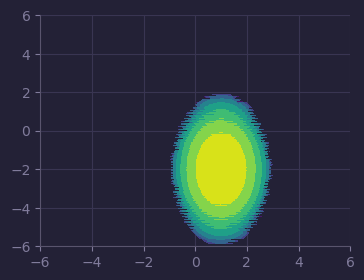

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.contourf(u[0,:], u[1,:], u[2,:])
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.grid(True);

#### Vertical Traces

Consider a function $z=f(x,y)$ with domain $D \in \mathbb{R}^2$. A vertical trace of the function can be either be:
1. the set of points that solves the equation $f(a,y)=z$ for a given constant $x=a$
2. The set of points that solves the equations $f(x,b)=z$ for a given constant $y=b$.

In [6]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = np.sin(x)*np.cos(y)
u = np.stack((x,y,z), 0)

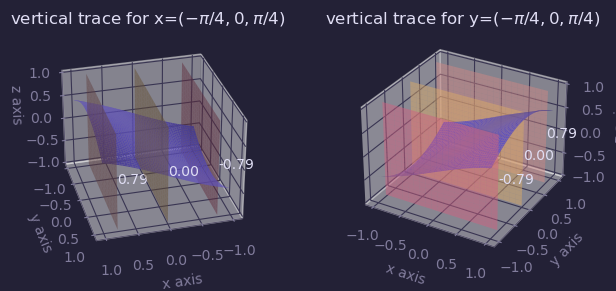

In [7]:

muls = [-np.pi/4, 0, np.pi/4, -np.pi/4, 0, np.pi/4]
fig, axs = plt.subplots(1, 2, figsize=(8,3), tight_layout = True, subplot_kw=dict(projection='3d'))

# plotting functions
titles = [r'vertical trace for x=$(-\pi/4, 0, \pi/4)$', r'vertical trace for y=$(-\pi/4, 0, \pi/4)$']
for i in range(2):
    axs[i].plot_surface(u[0,:], u[1,:], u[2,:], color='slateblue')
    # figure properties
    axs[i].set_xlabel('x axis')
    axs[i].set_ylabel('y axis')
    axs[i].set_zlabel('z axis')
    axs[i].set_title(titles[i])
axs[0].view_init(azim=75, elev=30)

# plotting vertical traces
for i in range(6):
    y, z = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
    x = muls[i]*np.ones_like(y)
    if i < 3:
        axs[0].plot_surface(x, y, z, alpha=0.5)
        axs[0].text(muls[i], 1.0, 0, f'{muls[i]:.2f}')
    else:
        axs[1].plot_surface(y, x, z, alpha=0.5)
        axs[1].text(1, muls[i], 0, f'{muls[i]:.2f}')

#### Level Surfaces

Given a function $f(x,y,z)$ and a number $c$ in the range of $f$, a level surface of a function of three variables is defined to be the set of points satisfying the equation $f(x,y,z)=c$.

### Limit and Continuity

#### Limit of a Function of Two Variables

Consider a point $(a,b) \in \mathbb{R}^2$. A $\delta$ disk centered at point (a,b) is defined to be an open disk of radius $\delta$ centered at point (a,b) -that is:
$$\{ (x,y) \in \mathbb{R}^2 | (x-a)^2 + (y-b)^2 < \delta^2\}$$
as compared to the limits in one dimension where we express restriction as :
$$a - \delta < x < a + \delta$$

#### Limit of a function of two variables

Let f be a function of two variables, x and y. The limit of f(x,y) as (x,y) approaches (a,b) is:
$$ \lim\limits_{(x,y)\to(a,b)} f(x,y) = L$$

#### Limit Laws 

1. Sum Law: $ \lim\limits_{(x,y)\to(a,b)}(f(x,y) + g(x,y)) = L + M$ <br><br>
2. Constant Multiple Law: $\lim\limits_{(x,y)\to(a,b)} (c(f(x, y))) = cL$ <br><br>
3. Product Law: $\lim\limits_{(x,y)\to(a,b)} ((f(x, y))g(x,y)) = LM$ <br><br>
4. Power Law:  $\lim\limits_{(x,y)\to(a,b)} ((f(x, y)))^n = L^n$

In [8]:
x, y = sp.symbols('x y')
expr = (2*x + 3*y) / (4*x - 3*y)
sp.limit(sp.limit(expr, x, 2),y,-1)


1/11

#### Interior Points and Boundary Points

Let S be subset of $\mathbb{R}^2$
1. **Interior point**: A point $P_0$ is called an *interior point* of *S* if there is a disk $\delta$ centered around $P_0$ contained compeletly in *S*.
2. **Exterior point**: A point $P_0$ is called  *boundary point* of *S* if every $\delta$ disk centered around $P_0$ contains points both inside and outside *S*.

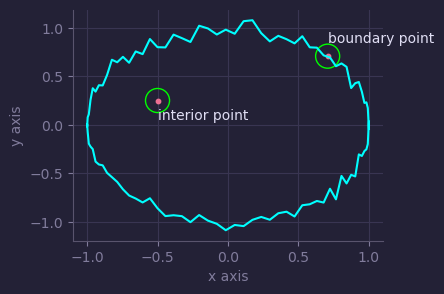

In [9]:
r = 1
theta = np.linspace(0, 2*np.pi, 100)
x = r * np.cos(theta)
y = r * np.sin(theta) + np.random.normal(0, 0.05, 100)

# plot inits
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

# plotting random function
ax.plot(x, y, color='cyan')
ax.scatter([-0.5,0.707], [0.25, 0.707], s=10)

# plotting interior and boundary points
ax.scatter([-0.5,0.707], [0.25, 0.707], s=300, facecolors='none', color='lime')

# text helpers
ax.text(0.71, 0.85, 'boundary point')
ax.text(-0.5, 0.05, 'interior point')

# figure properties
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.grid(True);

Let S be subset of $\mathbb{R}^2$:
1. **Open Set**: *S* is called an *open set* if every point of *S* is an interior point.
2. **Closed Set**: *S* is called an *closed set* if it contains all its boundary points.

#### Continuity of Functions of Two Variables 

A function $f(x,y)$ is continuous at a point $(a,b)$ un its domain if the following conditions are satisfied:
1. $f(a, b)$ exsists. <br><br>
2. $\lim\limits_{(x,y)\to(a,b)}f(x,y)$ exsists. <br><br>
3.  $\lim\limits_{(x,y)\to(a,b)}f(x,y) = f(a,b)$. <br><br>

In [10]:
x, y = sp.symbols('x y')
expr = (3*x + 2*y)/(x+y+1)
print(f'f(a,b) : {sp.Subs(expr,(x,y), (5, -3)).evalf()}')
print(f'lim[(x,y)->(a,b)] f(x, y) : {sp.limit(sp.limit(expr, x, 5), y, -3)}')

f(a,b) : 3.00000000000000
lim[(x,y)->(a,b)] f(x, y) : 3


**Properties:**
- Sum of continuous function is continuous.
- Product of continuous function is continuous.
- Composition of continuous function is continuous.

#### Limits of three or more variables

Let $(x_0,y_0,z_0)$ be a point in $\mathbb{R}^3$. Then a $\delta$-ball in three dimensions consists of all points in $\mathbb{R}^3$ lying at a distance of less than $\delta$ from $(x_0,y_0,z_0)$ that is:

$ \{ (x,y,z) \in \mathbb{R}^3 | \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2} < \delta \} $ .

In [11]:
x, y, z = sp.symbols('x y z')
expr = sp.sqrt(13 - x**2 - 2*y**2 + z**2)
display(Latex(r'$\lim\limits_{(x,y,z) \to  (4, -1, 3)} f(x,y,z) = $'))
print(sp.limit(sp.limit(sp.limit(expr, x, 4), y, -1), z, 3))

<IPython.core.display.Latex object>

2


### Partial Derivatives

#### Derivatives of a Function of Two Variables

Let f(x, y) be a function of two variables. Then the *partial derivatives* of *f* are defined as:
- $\frac{\partial f}{\partial x} = f_x(x, y)  = \lim\limits_{h \to 0} \frac {f(x+h, y) - f(x, y)}{h}$
- $\frac{\partial f}{\partial y} = f_y(x, y)  = \lim\limits_{h \to 0} \frac {f(x, y+k) - f(x, y)}{k}$

In [12]:
x, y = sp.symbols('x y')
expr = x**2 - 3*x*y + 2*y**2 - 4*x + 5*y -12
display(Latex(r'$\frac {\partial f}{\partial x} = $'))
display(sp.diff(expr,x))
display(Latex(r'$\frac {\partial f}{\partial y} = $'))
display(sp.diff(expr,y))

<IPython.core.display.Latex object>

2*x - 3*y - 4

<IPython.core.display.Latex object>

-3*x + 4*y + 5

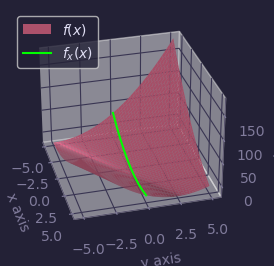

In [13]:
def f(x,y):
    return x**2 - 3*x*y + 2*y**2 - 4*x + 5*y -12

# surface points
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
z = f(x,y)

# point at which tangent line is drawn parellel to x-axis
x0, y0 = 2, 0
z0 = f(x0, y0)

# tangent line points
dx = np.linspace(x0 - 7, x0 + 3, 10)
dy = y0 * np.zeros_like(dx)
dz = f(dx, dy)

# plot intis
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1,1, 1, projection='3d')

# surfacee plot of funtion
surface = ax.plot_surface(x, y, z, label=r'$f(x)$')

# plotting fx (partial of f(x, y) w.r.t to x) parellel to x-axis
ax.plot(dx, dy, dz, color='lime', label=r'$f_x(x)$')

# figure properties
ax.view_init(azim=-15, elev=30)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.legend();

**Observation:**
- If we graph f(x,y) and f(x+h,y) for an arbitrary point (x,y), then the slope of the secant line passing through these two points is given by:
$$\frac{f(x + h, u) - f(x, y)}{h}$$
- The line is parallel to x-axis. Therefore, the slope of the secant line represents an average rate of change of the function f as we travel parallel to the x-axis. As h approaches zero, the slope of the secant line approaches the slope of the tangent line.
- If we choose to change y instead of x by the same incremental value h, then the secant line is parallel to the y-axis and so is the tangent line.

#### Higher Order Partial Derivatives

Each of these partial derivatives is a function of two variables, so we can calculate partial derivatives of these functions. Just as with derivatives of single-variable functions, we can call these second-order derivatives, third-order derivatives, and so on.  
$$
\begin{align*} \dfrac{∂^2f}{∂x^2} &=\dfrac{∂}{∂x}\left[\dfrac{∂f}{∂x}\right] \\[4pt] 
\dfrac{∂^2f}{∂y∂x} &=\dfrac{∂}{∂y}\left[\dfrac{∂f}{∂x}\right] \\[4pt] 
\dfrac{∂^2f}{∂x∂y} &=\dfrac{∂}{∂x}\left[\dfrac{∂f}{∂y}\right] \\[4pt] 
\dfrac{∂^2f}{∂y^2} &=\dfrac{∂}{∂y}\left[\dfrac{∂f}{∂y}\right].\end{align*}
$$

Higher-order partial derivatives calculated with respect to different variables, such as $f_{xy}$ and $f_{yx}$ are commonly called **mixed partial derivatives**.

In [14]:
x, y = sp.symbols('x y')
expr = x * sp.exp(-3*y) + sp.sin(2*x - 5*y)
display(Latex(r'$\frac {\partial f}{\partial x}$'))
display(sp.diff(expr, x))
display(Latex(r'$\frac {\partial f}{\partial y}$'))
display(sp.diff(expr, y))
display(Latex(r'$\frac {\partial^2 f}{\partial x^2} $'))
display(sp.diff(expr, x, 2))
display(Latex(r'$\frac {\partial^2 f}{\partial y^2} $'))
display(sp.diff(expr, y, 2))
display(Latex(r'$\frac {\partial^2 f}{\partial x \partial y} $'))
display(sp.diff(sp.diff(expr, x), y))
display(Latex(r'$\frac {\partial^2 f}{\partial y \partial x} $'))
display(sp.diff(sp.diff(expr, y), x))

<IPython.core.display.Latex object>

2*cos(2*x - 5*y) + exp(-3*y)

<IPython.core.display.Latex object>

-3*x*exp(-3*y) - 5*cos(2*x - 5*y)

<IPython.core.display.Latex object>

-4*sin(2*x - 5*y)

<IPython.core.display.Latex object>

9*x*exp(-3*y) - 25*sin(2*x - 5*y)

<IPython.core.display.Latex object>

10*sin(2*x - 5*y) - 3*exp(-3*y)

<IPython.core.display.Latex object>

10*sin(2*x - 5*y) - 3*exp(-3*y)

**Clairut's Theorem**(Equality of Mixed Partial Derivatives)<br><br>
Suppose that $f(x,y)$ is defined on an open disk D that contains the point $(a,b)$. If the functions $f_{xy}$ and $f_{yx}$ are continuous on D, then $f_{xy}(a,b)=f_{yx}(a,b)$.

### Planes, Approximations and Total Differential

#### Tangent Planes

Let $P_0=(x_0,y_0,z_0)$ be a point on a surface S, and let C be any curve passing through $P_0$ and lying entirely in S. If the tangent lines to all such curves C at $P_0$ lie in the same plane, then this plane is called the tangent plane to S at $P_0$.
<br><br>
**Equation of Tangent Planes** <br>
Let *S* be a surface defined by a differentiable function $z = f(x, y)$ and let $P_0 = (x_0, y_0) be a point in the domain of $f$. Then, the equation of the tangent plane to $S$ at $P_0$ is given by :
$$ z = f(x_0,y_0) + f_x(x_0,y_0)(x-x_0) + f_y(x_0,y_0)(y-y_0)$$

In [15]:
x, y = sp.symbols('x y')
f = 2*x**2 - 3*x*y + 8*y**2 + 2*x -4*y + 4
x0, y0 = 2, -1

fx = sp.diff(f, x)
fy = sp.diff(f, y)

z = f.subs({x:x0,y:y0}) + fx.subs({x:x0,y:y0}) * (x - x0) + fy.subs({x:x0,y:y0}) * (y - y0)
print(f'Equation of tangent plane at point P({x0},{y0})')
display(z)

Equation of tangent plane at point P(2,-1)


13*x - 26*y - 18

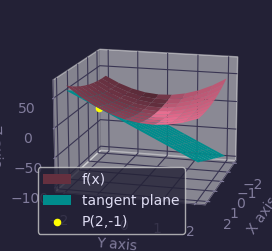

In [16]:
x , y = np.meshgrid(np.linspace(-2,2,10), np.linspace(-2,2,10))
z = lambda x, y : 2*x**2 - 3*x*y + 8*y**2 + 2*x -4*y + 4
tangent_plane = 13*x - 26*y - 18
# plot init
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111, projection='3d')

# surface plot of function
ax.plot_surface(x, y, z(x, y), label='f(x)')

# surface plot of tangent plane
ax.plot_surface(x, y, tangent_plane, color='cyan', label='tangent plane')

# point P(2,-1) where tangent plane is obtained
ax.scatter(x0, y0, z(x0, y0), color='yellow',label='P(2,-1)')

# figure properties
ax.view_init(azim=15, elev=15)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend();

#### Linear Approximations

he idea behind using a linear approximation is that, if there is a point $(x_0,y_0)$ at which the precise value of $f(x,y)$ is known, then for values of $(x,y)$ reasonably close to $(x_0,y_0)$, the linear approximation (i.e., tangent plane) yields a value that is also reasonably close to the exact value of $f(x,y)$.
$$L(x,y) = f(x_0,y_0) + f_x(x_0,y_0)(x-x_0) + f_y(x_0,y_0)(y-y_0)$$

#### Differentiability

A function f(x,y) is differentiable at a point $P(x_0,y_0)$ if, for all points (x,y) in a $\delta$ disk around P, we can write:
$$f(x,y) = f(x_0,y_0) + f_x(x_0,y_0)(x-x_0) + f_y(x_0,y_0)(y-y_0) + E(x,y)$$
where the error term *E* satisfies
$$\lim\limits_{(x,y)\to(x_0,y_0)} \frac{E(x,y)}{\sqrt{(x-x_0)^2 + (y-y_0)^2}} = 0 $$

The error term and it represents how closely the tangent plane comes to the surface in a small neighborhood ($\delta$ disk) 
<br><br>The idea behind differentiability of a function of two variables is connected to the idea of smoothness at that point. In this case, a surface is considered to be smooth at point P if a tangent plane to the surface exists at that point. If a function is differentiable at a point, then a **tangent plane** to the surface exists at that point.

In [17]:
x, y = sp.symbols('x y')
x0, y0 = 2, -3
f = 2*x**2 - 4*y
dfdx = sp.diff(f, x)
dfdy = sp.diff(f, y)
tangent_plane = f.subs({x:x0, y:y0}) + dfdx.subs({x:x0, y:y0})*(x-x0) + dfdy.subs({x:x0, y:y0})*(y-y0)
E = f - tangent_plane
display(Latex(r'$E(x,y) = $'))
display(E)
display(Latex(r'$\lim\limits_{(x,y)\to(2, -3)} \frac{E(x,y)}{\sqrt{(x-x_0)^2 + (y-y_0)^2}} =$'))
display(sp.limit(sp.limit(E, x, x0), y, y0))

<IPython.core.display.Latex object>

2*x**2 - 8*x + 8

<IPython.core.display.Latex object>

0

**Differentiability Implies Continuity**<br><br>
Let $z=f(x,y)$ be a function of two variables with $(x_0,y_0)$ in the domain of $$. If $f(x,y)$ is differentiable at $(x_0,y_0)$, then $f(x,y)$ is continuous at $(x_0,y_0)$.

**Continuity of First Partials Implies Differentiability**<br><br>

Let $z=f(x,y)$ be a function of two variables with $(x_0,y_0)$ in the domain of $f$. If $f(x,y)$, $f_x(x,y)$, and $f_y(x,y)$ all exist in a neighborhood of $(x_0,y_0)$ and are continuous at $(x_0,y_0)$, then $f(x,y)$ is differentiable there.

#### Total Differential

Let $z=f(x,y)$ be a function of two variables with $(x_0,y_0)$ in the domain of f, and let $\Delta x$ and $\Delta y$ be chosen so that $(x_0+\Delta x,y_0+\Delta y)$ is also in the domain of f. If f is differentiable at the point (x0,y0), then the differentials dx and dy are defined as
$$ dx = \Delta x \qquad dy = \Delta y$$
The differential $dz$, also called the total differential of $z=f(x,y)$ at $(x_0,y_0)$, is defined as
$$ dz = f_x(x_0, y_0)dx + f_y(x_0, y_0) dy$$

Notice that the symbol $\delta$f is not used to denote the total differential; rather, $d$ appears in front of $z$. <br><br>
Now, let's define $\Delta z = f(x + \Delta x, y + \Delta y) - f(x,y)$. This can be used further to approximate the following:
$$f(x + \Delta x, y + \Delta y) = f(x,y) + \Delta z \approx f(x, y) + f_x(x_0, y_0)\Delta x + f_y(x_0, y_0) \Delta y$$

In [18]:
x, y = sp.symbols('x y')
expr = 3*x**2 - 2*x*y + y**2
x0, y0 = 2, -3
dx = 0.1
dy = -0.05

dfdx = sp.diff(expr, x)
dfdy = sp.diff(expr, y)

dz = dfdx.subs({x:x0, y:y0})*dx + dfdy.subs({x:x0, y:y0})*dy

deltaz = expr.subs({x:x0+dx, y:y0+dy}) - expr.subs({x:x0, y:y0})

display(Latex(r'$\Delta z$'))
display(deltaz)
display(Latex(r'$dz$'))
display(dz)

<IPython.core.display.Latex object>

2.34250000000000

<IPython.core.display.Latex object>

2.30000000000000

### Chain Rule For Multiple Variables

#### Chain Rule for One Independent Variable

Suppose that $x=g(t)$ and $y=h(t)$ are differentiable functions of $t$ and $z=f(x,y)$ is a differentiable function of $x$ and $y$. Then $z=f(x(t),y(t))$ is a differentiable function of t and:
$$ \dfrac{dz}{dt}=\dfrac{∂z}{∂x}⋅\dfrac{dx}{dt}+\dfrac{∂z}{∂y}⋅\dfrac{dy}{dt} $$
where the ordinary derivatives are evaluated at t and the partial derivatives are evaluated at (x,y).

In [19]:
t =  sp.symbols('t')
f = 4*sp.sin(t)**2 + 3*sp.cos(t)**2
sp.diff(f, t)

2*sin(t)*cos(t)

In [20]:
x, y = sp.symbols('x y', cls=sp.Function)
x = sp.sin(t)
y = sp.cos(t)
f = sp.Add(sp.Mul(sp.Pow(x, 2), 4), sp.Mul(sp.Pow(y, 2), 3))
sp.diff(f, t)

2*sin(t)*cos(t)

#### Chain Rule for Two Independent Variables

Suppose $x=g(u,v)$ and $y=h(u,v)$ are differentiable functions of $u$ and $v$, and $z=f(x,y)$ is a differentiable function of $x$ and $y$. Then, $z=f(g(u,v),h(u,v))$ is a differentiable function of $u$ and $v$, 
and partial derivatives of z are:
$$ \dfrac{∂z}{∂u}=\dfrac{∂z}{∂x}\dfrac{∂x}{∂u}+\dfrac{∂z}{∂y}\dfrac{∂y}{∂u}$$ 
and 
$$ \dfrac{∂z}{∂v}=\dfrac{∂z}{∂x}\dfrac{∂x}{∂v}+\dfrac{∂z}{∂y}\dfrac{∂y}{∂v} $$

In [21]:
u, v = sp.symbols('u v')
x, y, f = sp.symbols('x y f', cls=sp.Function)
x = 3*u + 2*v
y = 4*u - v

f = 3*x**2 -2*x*y + y**2
display(Latex(r'$\frac{\partial z}{\partial u} = $'))
display(sp.diff(f, u))
display(Latex(r'$\frac{\partial z}{\partial v} = $'))
display(sp.diff(f, v))

<IPython.core.display.Latex object>

38*u + 18*v

<IPython.core.display.Latex object>

18*u + 34*v

#### Generalized Chain Rule

Let $w=f(x1_,x_2, \dots,x_m)$ be a differentiable function of $m$ independent variables, and for each $i\in 1,\dots ,m$ let $x_i=x_i(t_1,t_2,\dots,t_n)$ be a differentiable function of $n $independent variables. Then
$$
\frac{\partial w}{\partial t_j} = \frac{\partial w}{\partial x_1} \frac{\partial x_1}{\partial t_j} +
\frac{\partial w}{\partial x_2} \frac{\partial x_2}{\partial t_j} + \dots + \frac{\partial w}{\partial x_m} \frac{\partial x_m}{\partial t_j}
$$
for any $j \in 1, 2, \dots, n$

In [22]:
u, v = sp.symbols('u v')
x, y, z, w = sp.symbols('x y z w', cls=sp.Function)

x = sp.Mul(sp.exp(u),sp.sin(v))
y = sp.Mul(sp.exp(u),sp.cos(v))
z = sp.exp(u)

w = 3*x**2 - 2*x*y + 4*z**2

display(Latex(r'$\frac{\partial w}{\partial u} = $'))
display(sp.diff(w, u))
display(Latex(r'$\frac{\partial w}{\partial v} = $'))
display(sp.diff(w, v))

<IPython.core.display.Latex object>

6*exp(2*u)*sin(v)**2 - 4*exp(2*u)*sin(v)*cos(v) + 8*exp(2*u)

<IPython.core.display.Latex object>

2*exp(2*u)*sin(v)**2 + 6*exp(2*u)*sin(v)*cos(v) - 2*exp(2*u)*cos(v)**2

#### Implicit Differentiation

Suppose that $y$ is defined implicitly as a function of $x$ via the equation $f(x,y) = 0$, we can apply the chain rule to find $dx/dy$:
$$
\frac{d}{dx} f(x, y) = \frac{d}{dx}(0) \\[1em]
\frac{\partial f}{\partial x} \cdot \frac{dx}{dx} + \frac{\partial f}{\partial y} \cdot \frac{dy}{dx} = 0 \\[1em]
\frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} \cdot \frac{dy}{dx} = 0 \\[1em]
\frac{dy}{dx} = - \frac {\partial f / \partial x}{\partial f / \partial y}
$$

In [23]:
x, y = sp.symbols('x y')
f = 3*x**2 - 2*x*y + y**2 + 4*x - 6*y - 11

dy_dx = -sp.diff(f, x) / sp.diff(f, y)
x0, y0 = 2, 1
m = dy_dx.subs({x:x0, y:y0})

print(f'partial of f(x,y) w.r.t x: {sp.diff(f, x)}\npartial of f(x, y) w.r.t y: {sp.diff(f, y)}')
print('\nEquation of tangent at point P(2,1):')
display(m*(x-x0) + y0)

partial of f(x,y) w.r.t x: 6*x - 2*y + 4
partial of f(x, y) w.r.t y: -2*x + 2*y - 6

Equation of tangent at point P(2,1):


7*x/4 - 5/2

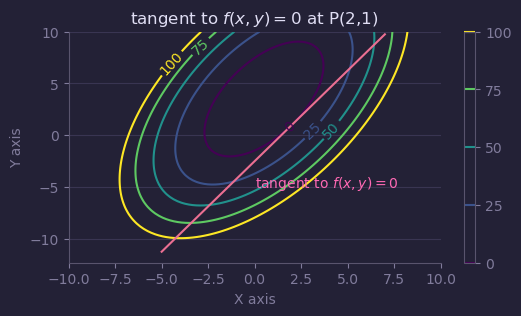

In [24]:
def f(x, y):
    return 3*x**2 - 2*x*y + y**2 + 4*x - 6*y - 11

t = np.linspace(-10, 10, 100)
x, y = np.meshgrid(t, t)

# plot init
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)

# contours plot
levels = np.linspace(0, 100, 5)
contours = ax.contour(x, y, f(x, y), levels)
ax.clabel(contours)
fig.colorbar(contours, ax=ax)

# tangent to contour at (2,1)
ax.plot(np.linspace(-5, 7), 7/4*np.linspace(-5, 7) - 2.5)


# text display
ax.text(0, -5, f'tangent to $f(x,y)=0$', color='hotpink');

# figure properties
ax.set_title(f'tangent to $f(x,y)=0$ at P({x0},{y0}) ')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis');